# An Introduction to Regression in Python

In this tutorial we will cover regression, starting from the basics to a few advanced features.  This tutorial will focus on classical and statistical rigourous methods.  We will make use of statistical tests throughout.

## Material

* Definition of a Statistical Model
* Maximum Likelihood Estimation - A Review
    * Ratios
    * percentages
    * point estimation
    * pre-bayesian analysis
* Linear Regression
    * the OLS algorithm
        * newton's method
        * stochastic gradient descent
    * Parameter testing
        * t-tests
        * f-tests
    * Goodness of fit measures
        * KL-Divergence
        * AIC
        * BIC
        * R^2
        * Mean Squared Error
        * Mean Absolute Error
    * Parameter Interpretation
        * linear - linear model
        * log - linear model
        * linear - log model
        * log - log model
        * linear - exponential model
* Generalized Least Squares
    * Distributions - digression (as a model)
        * gaussian
        * poisson
        * gamma
        * binomial
        * inverse gaussian
        * negative binomial
    * Parameter testing
        * ks 2 sample test (non parametric t-test)
        * Kruskal-Wallis (non parametric F-test)
    * Goodness of fit
        * Mean Squared Error
        * Mean Absolute Error
    * Parameter Interpretation
        * gaussian 
        * poisson
        * gamma
        * binomial
        * inverse gaussian
        * negative binomial
* Hierarchical Data
    * groupby - digression
    * fixed effects model
        * parameter testing
        * goodness of fit
        * parameter interpretation
    * mixed effects model
        * parameter testing
        * goodness of fit
        * parameter interpretation
* Regularization
    * distance functions - digression
        * triangle inequality
        * euclidean distance
        * manhattan distance
    * L1 regularization with OLS
    * L2 regularization with OLS
    * Lasso Regression
    * Ridge Regression
    * ElasticNet Regression

https://colab.research.google.com/gist/sagarmainkar/5cfa33898a303f895da5100472371d91/notebook.ipynb

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html

http://datacognizant.com/index.php/ml-algorithms-decoded/

http://www.math.wm.edu/~leemis/chart/UDR/UDR.html

https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

http://www.stat.tamu.edu/~twehrly/611/distab.pdf


# Defining a Statistical Model

In the most general sense, the goal of statistics is understand the world around us.  Often times, to do this, we come up with a mental model of the world, from data.  If our data is of a high quality and is an accurate reflection of the world around us, the model we come up with can possibly be an accurate reflection of the world, rather than meaningless symbols or "just notation".  

With a well informed model, we can simulate the underlying phenomenon we captured data on, either extrapolating into the future what might happen in the real world, understanding what's happening now, even if we can't directly observe it, or being able to automate away an extremely hard task.  

Statistical models allow us to ask - 

* What if?
* What's happening now?
* Why is it happening?

And actually come up with answers that might be reasonable!  

Additionally, statistical models allow us to automate tasks that appear like science fiction; we can teach robots to simulate processes of cognition like sight, hearing, and speech.  

In order to understand how these models work, we'll need quite a bit of mathematical rigour, but the pay off will be the ability to simulate and understand the world around us through computation.

# Maximum Likelihood Estimation

Before we start introducing statistical models, we need the right mental model of what a statistical model is and does.  For this we turn to maximum likelihood estimation.  You may recall from last time that maximum likelihood estimation can be used to find the shape parameters of a distribution.  Recall that the shape parameters are merely the associated measures of center, spread, skew, kurtosis and higher order terms that allow us to easily define an accurate description of the underlying data through a process that generates data similar to the distribution of values seen.

Realize, that given the above description, we've already seen our first statistical model - the process (or mathematical formula) that generates a distribution of data via sampling.

Let's review with a few examples to see this in action:

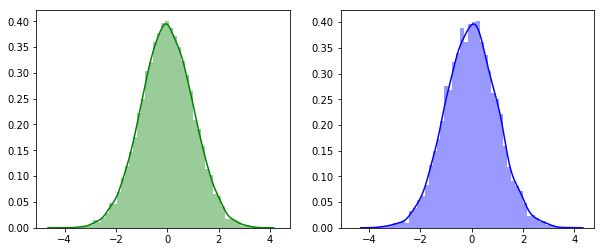

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

data = np.random.normal(0, 1, size=10000)
center, spread = stats.norm.fit(data)
simulated_data = np.random.normal(center, spread, size=10000)

f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( data , color="green", ax=axes[0])
sns.distplot( simulated_data , color="blue", ax=axes[1])
plt.show()

As you can see here there is very little difference between the simulated data and or original source!  This is because we made a few assumptions:

1. we assumed a normal distribution when simulating our data
2. we assumed we had enough original data to come up with reasonable shape parameters

We can even go further to verify that this is the case by overlapping the two distributions:

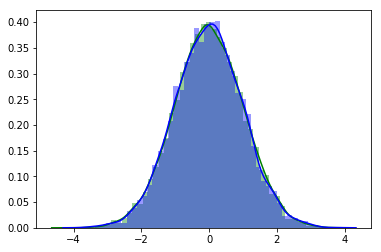

In [7]:
sns.distplot( data , color="green")
sns.distplot( simulated_data , color="blue")
plt.show()

In general, this leads us to a conclusion - we can think of the underlying distribution that our most closely resembles as sort of a mental model for our real world phenomenon.  By understanding the underlying distribution that creates our process, in this case a normal distribution, we can simulate accurate representations of our underlying process, by only knowing the center and spread of the data!

Let's take a real world example:

In [27]:
crashes = sns.load_dataset("car_crashes")
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [24]:
help(stats.normaltest)

Help on function normaltest in module scipy.stats.stats:

normaltest(a, axis=0, nan_policy='propagate')
    Test whether a sample differs from a normal distribution.
    
    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.
    
    
    Parameters
    ----------
    a : array_like
        The array containing the sample to be tested.
    axis : int or None, optional
        Axis along which to compute test. Default is 0. If None,
        compute over the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        ``s^2 + k^2``, wh

We first recall the null hypothesis of the test, in this case, the null hypothesis is that the data is normally distributed.

In [28]:
stats.normaltest(crashes["total"])

NormaltestResult(statistic=0.19732083699768993, pvalue=0.9060503337210413)

Next we verify that our data is normally distributed.  With a p-value of 0.906 we fail to reject the null hypothesis somewhat strongly and therfore we can guess the data is likely normally distributed.  Now, let's see if we can generate more data:

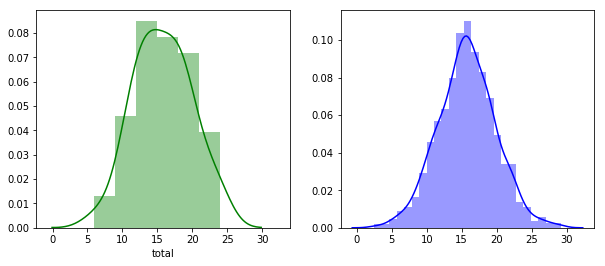

In [33]:
center, spread = stats.norm.fit(crashes["total"])
simulated_crash_totals = np.random.normal(center, spread, size=len(crashes)*20)
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( crashes["total"] , color="green", ax=axes[0])
sns.distplot( simulated_crash_totals , color="blue", ax=axes[1])
plt.show()

As you can see, there isn't an exact match but the center and spread are approximately the same.  This graph shows us, assuming we trust our data, what it would be likely if more countries had car policies and infrastructure similar to the USA with respect to car saftey?  We can see, it would be likely that the maximum number of deaths per billion miles would likely have a high end of around 30 and a low end of close to zero.

Source of data: http://seaborn.pydata.org/examples/horizontal_barplot.html?highlight=car%20crashes

## The Connection Between Likelihood and Probability

Before we leave our high level discussion, there is an important point to make - 

$$ Likelihood(data | \mu, \sigma) \neq Probability(\mu, \sigma | data) $$

This is because with the likelihood we ask, what are the most likely shape parameters that could have generated this data?  With the probability we ask, given these shape parameters what is the probability we saw this data?

So we can think of these as two sides of the same coin for estimation purposes.

Let's see what the probability would look like in python:

Source: https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

In [39]:
def probability(mu, sigma, data):
    simulated_data = np.random.normal(mu, sigma, size=len(data))
    return stats.ttest_ind(simulated_data, data)[1]

data = np.random.normal(0, 1, size=10000)
mu_guess = 0
sigma_guess = 1
probability(mu_guess, sigma_guess, data)
# probability that given these shape parameters we saw this data

0.8624157075606645

# The Problem With Percentages - A Digression

Imagine for a second that you are running on a treadmill.  At the moment you are about 80% done with your first mile.  It took you about 5 minutes to get to this point, how long do you think it would take you to get from 1/5 left to 1/9 left?  

To better conceptualize this question let's look at some pie charts:

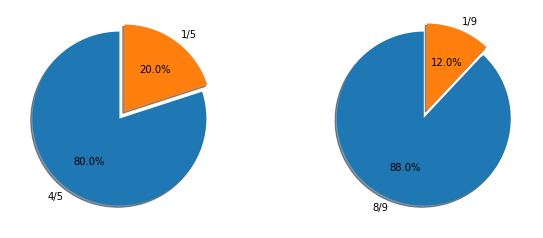

In [44]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '4/5', '1/5', 
sizes = [80, 20]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
axes[0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '8/9', '1/9', 
sizes = [88, 12]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
axes[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()


As you can see, the difference in percentage is about half, but how fast do you think you'd go from 1/5 left to 1/9?  At that given pacing, it takes about 30 seconds and what's more the fraction get smaller exponentially fast with each passing second.  That's because there is increasingly less distance left between you, the runner, and the intended finish line.  But numbers and percentages don't capture this well.  This is because it's hard to reason about asymptotics of a system.

So why do fractions fall apart semantically in this example?  It's because we are trying to capture something precisely with fractions whose components (numerator and denominator) as less than 10!  Do percentages make more sense in this case?  Let's rephrase the question:

Imagine for a second that you are running on a treadmill. At the moment you are about 80% done with your first mile. It took you about 5 minutes to get to this point, how long do you think it would take you to get from 80% left to 88% left?

Does 30 seconds to go 8% of the distance make more sense, then going 1/9 in 30 seconds?  Perhaps it does.  

However there is a larger problem here:

Depending on the units you are talking about 5% or 8% could be a huge amount or a very small amount.  It all comes down to what you are talking about.  For instance, most economists agree a health economy grows at around 2% per year!  This number feels small, until you consider what 2% means for the US economy or other developed nations.

If the US economy grows 2% this year that will mean it grows approximately:

388 billion dollars

We also experience this problem with the rareity of an event:

What is the probability that any of microsoft's servers fails in the next hour given that the probability a given server fails is 0.01%?  

Well that depends on something very important: how many servers do we have?  I personally don't know the exact number but a safe guess in order of magnitude is something like:

$80,000 servers * 8 data centers * 5 availability zones * 24 regions \approx$ 

77 million!!!

We can figure this out by multiplying the probability a server fails times the number of servers:

7700.0

So around 8,000 will fail in the next hour alone!!  I certainly wouldn't have guessed that from the probability of an individual server.

Source: https://www.forbes.com/sites/johnsonpierr/2017/06/15/with-the-public-clouds-of-amazon-microsoft-and-google-big-data-is-the-proverbial-big-deal/#6e5918692ac3

We also experience this problem with floating point numbers in computation.  Because the size of computers are finite, they cannot represent the full precision of values which sometimes means our statistical algorithms don't converge, even when they should theoretically!!

So sometimes, the numbers themselves aren't precise enough for us to do mathematics properly.  

## The Flaw in MLE

The reason I bring all this up, is because of how Maximum Likelihood Estimation is done:

We take an estimate by looking for the choice of shape parameters which maximize the likelihood, but the likelihood is like a probability, it works over a percentage or fraction.  It chooses its parameters by taking a "best" guess.  But the truth is there may be much higher confidence by just taking a small range of values around a desired level of acceptability, rather than insisting on a point estimate that maximizes things.

To understand this, let's look at test scores:

Say we had a class of students and we wanted to choose the folks who did well in the course.  First let's try to pick all those who scored in the top 10% of the class.  And then let's try to pick all those who got 90% or above of the total points available for the course:

In [51]:
scores = np.random.normal(75, 25, size=10000)
scores = scores[scores < 100]

In [55]:
print("Students who scored in the top 10 percentile", len(scores[scores > np.percentile(scores, 90)]))
print("Students who got a score of 90% or better", len(scores[scores >= 90]))

Students who scored in the top 10 percentile 841
Students who got a score of 90% or better 1145


Notice there is an important difference there!  This is because the semantics matter a lot and by picking hard cut offs for what "best" means we limit ourselves slavishly to the misunderstandings of the representations of semantics numerically.

Let's take a closer look at the distribution of scores:

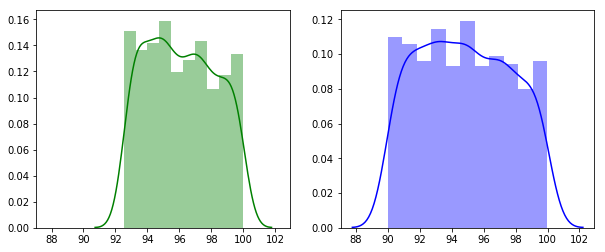

In [56]:
top_10 = scores[scores > np.percentile(scores, 90)]
top_90 = scores[scores > 90]
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( top_10 , color="green", ax=axes[0])
sns.distplot( top_90 , color="blue", ax=axes[1])
plt.show()

With this theoretical example, are the kids on the left "really" any smarter than the kids on the right?  Absolutely not!  And yet some of them would get an A and some of them would get a B based on these cut offs.  

Let's say this were a university course, that might be the difference between getting into graduate school or not, for at least some of these students.  And that's because the semantics of what an A means varies wildly across different universities and different professors.  

To summarize, so this is the issue with point estimates:

Numbers are precise, but humans are not usually and even then, because we are doing math on computers, we lose some precision.  So taking a point estimate may not always give you what you want.  It does okay, but you might miss out on a lot of important stuff.  And if you aren't careful, you could get something very important wrong, which could be highly dependent on your use case.

## How We Can Correct This

One of these easiest ways to do this is to go bayesian.  I won't explain all the theory behind it, but basically bayesians say, instead of taking a point estimate, we take a bunch of points around what we think is a good point estimate.  This allows us to be wrong, allows us to be surprised and most importantly, allows us to still learn things, without throwing out the good stuff.

So if we used a bayesian mindset for the above example, we'd say:

Give me everything around the 90th percentile and give me everything around people that scored 90% percent of the points or better:

In [57]:
print("Students who scored around the top 10 percentile", len(scores[scores > np.percentile(scores, 85)]))
print("Students who got around a score of 90% or better", len(scores[scores >= 85]))

Students who scored around the top 10 percentile 1261
Students who got around a score of 90% or better 1817


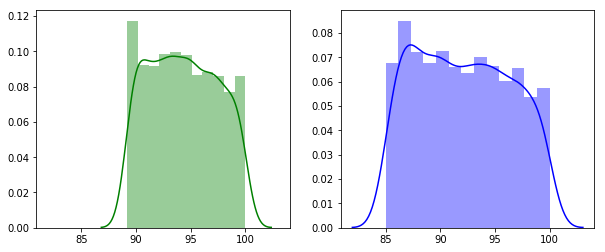

In [58]:
top_10 = scores[scores > np.percentile(scores, 85)]
top_90 = scores[scores > 85]
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( top_10 , color="green", ax=axes[0])
sns.distplot( top_90 , color="blue", ax=axes[1])
plt.show()

So functionally what did we do?  We gave ourselves some slack.  We didn't pick the exact number we were shooting for.  But what does that give us?  Well for instance, by choosing the top 85% we can now see more data and then make an informed choice about individual students that may or may not deserve an A.  Now we can factor in how hard those students at the bottom worked to get that overall score of 85 or to get into the top 85% percentile.  And then we can make a value judgement, based on domain expertise about who deserves an A in the course!

Notice - we lose precision in our point estimate, because now things are more fuzzy.  But!  We gain the ability to be more discerning about our data, our model, and our results.

In the remainder of the lecture, we'll see how point estimates try to account directly for this by looking at the shape parameters of the distribution of errors during training and how this can help inform the models we create!

## Linear Regression 

Linear Regression is one of the simplest and most interpretable models there is.  Before we dive into it's specifics, let's first see how it relates to maximum likelihood estimation:

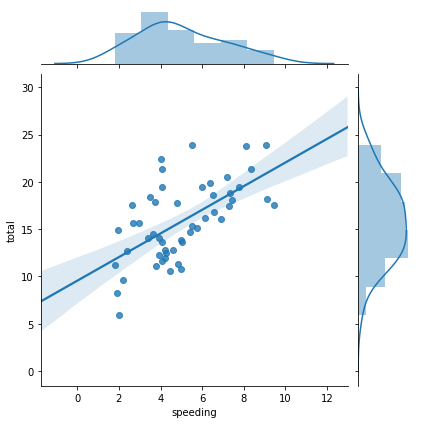

In [63]:
sns.jointplot(x="speeding", y="total", data=crashes, kind="reg")
plt.show()

Here we see the joint distribution of car crashes where the driver was speeding per billion miles and the total car crashes per billion miles.  By looking at the blue shaded line we see the joint simulated distribution from the relationship between the shape parameters of the shared distribution.  Additionally, we see the point estimate - the maximum likelihood estimation - the dark blue line cutting through the data.

The reason why a distribution like this:

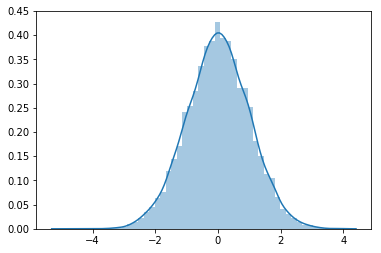

In [66]:
data = np.random.normal(0, 1, size=10000)
sns.distplot(data)
plt.show()

is simple - it's because the maximum point estimate for this distribution is where the majority of the top of the theoretical curve that represents the shape of the distribution.  In other words, the MLE takes the highest point of the distribution.  In two dimensional space, this is represented as a line as the above picture shows.

## The Ordinary Least Squares Algorithm

The Ordinary Least Squares Algorithm is probably the simplest thing you could think of - Here is the psuedo code for the algorithm:

1. start with a line cutting through the data (perhaps pick two random points in the space and draw a line through them)
2. look at the difference between all the points and the line
3. update the line such that the sum of the squared differences is made smaller
4. repeat until the sum of squared differences is as small as possible

There are lots of ways to implement this, we'll look at a few methods here:

### Newton's Method

Newton's method is one of may methods for doing the approximation to do the minimization:

In [86]:
#These choices depend on the problem being solved
x0 = 1 #The initial value
f = lambda x : x**2 - 2 #The function whose root we are trying to find
fprime = lambda x : 2*x #The derivative of f(x)
tolerance = 10**(-7) #7 digit accuracy is desired
epsilon = 10**(-14) #Don't want to divide by a number smaller than this

def newton_raphson_method(x0, f, fprime, tolerance, epsilon):
    max_iterations = 20 #Don't allow the iterations to continue indefinitely
    haveWeFoundSolution = False #Have not converged to a solution yet

    for i in range(max_iterations):
        y = f(x0)
        yprime = fprime(x0)

        #Don't want to divide by too small of a number
        # denominator is too small
        if(abs(yprime) < epsilon):
            break 

        x1 = x0 - y/yprime #Do Newton's computation

        if(abs(x1 - x0) <= tolerance * abs(x1)): #If the result is within the desired tolerance
            haveWeFoundSolution = True
            break
        x0 = x1 #Update x0 to start the process again
    if haveWeFoundSolution:
        return x1
    else:
        return "did not converge"
    
print("Root", newton_ralphson_method(x0, f, fprime, tolerance, epsilon))

Root 1.4142135623730951


## Stochastic Gradient Descent

Now that we have an idea broadly of how to miminize a function let's see how this works for linear regression.  For this will make use of a common algorithm called stochastic gradient descent:


In [80]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

In [85]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        # derivative of the cost function is applied here notice
        # the 1/m and the dot product
        # the learning rate is a dampener on the gradient
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [82]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

y_predict = X_b.dot(theta)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.704,
Theta1:          3.251
Final cost/MSE:  5314.306


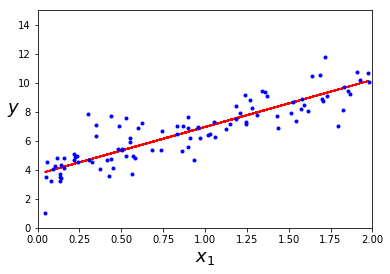

In [84]:
plt.plot(X,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

As you can see, the same general idea employed in newton_raphson is applied here.  The major difference is that now things are more sophisticated with the introduction of a cost function making the gradient less straight forward.  Also we need to take the sum over all errors.  But that really just means the function we are differentiating is more complex, the fundamental algorithm is the same.

## T-Tests and F-Tests

Now let's look at an example using a library (which you'll usually do) to do linear regression:

In [89]:
import statsmodels.api as sm

speeding = sm.add_constant(crashes["speeding"])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     29.27
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           1.87e-06
Time:                        16:05:29   Log-Likelihood:                -132.15
No. Observations:                  51   AIC:                             268.3
Df Residuals:                      49   BIC:                             272.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5459      1.243      7.680      0.000       7.048      12.044
speeding       1.2493      0.231      5.411      0.000       0.785       1.713
==============================================================================
Omnibus:                        2.847   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.681
Skew:                           0.542   Prob(JB):                        0.262
Kurtosis:                       2.709   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's start by understanding what the "t-test" and the "f-test" mean in this context.  If you recall from last time, in general the t-test is used to test whether or not two different samples come from the same distribution.  In this case the "t-test" tests the null hypothesis that the given independent variable is different from zero.  So if we reject the null hypothesis, in this case, it is different than zero.

Likewise for the "F-test", in general it tests if 2 or more variables come from the same population.  In this case, the null hypothesis states that all the variables jointly equal zero or in otherwords, contribute nothing to the explaination of the y variable.

To be specific, in the above example with respect to the t-tests:

We reject the null hypothesis both times, therefore speeding and the constant term both are different than zero.  This means there is some bias term that is constant and speeding both contribute statistically to the explaination of total car crashes per billion miles.

We also reject the null hypothesis that the variables jointly are zero and therefore the model does have statistical meaning.

Source: https://stats.stackexchange.com/questions/59250/how-to-interpret-the-output-of-the-summary-method-for-an-lm-object-in-r

## Goodness of fit measures

The next two measures we will look at are Akaike Information Criterion and Bayesian Information Criterion, but first we will look at the algorithm that underlies them both: KL - Divergence

### Digression - KL-Divergence

Kullback Liebler divergence is, like many other things in statistics a way of measuring how different two distributions are.  But the way it asks the question and the usrs of KL-Divergence are surprisingly rich.  Checkout this quote from wikipedia:

"Expressed in the language of Bayesian inference, ${\displaystyle D_{\text{KL}}(P\parallel Q)}$  is a measure of the information gained when one revises one's beliefs from the prior probability distribution Q to the posterior probability distribution P.  In other words, it is the amount of information lost when Q is used to approximate P.  In applications, P typically represents the "true" distribution of data, observations, or a precisely calculated theoretical distribution, while Q typically represents a theory, model, description, or approximation of P.  In order to find a distribution Q that is closest to P, we can minimize KL divergence and compute an information projection."

Source: https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence

While this feels like a restatement of ks_2sample with fewer guarantees:

1. it's assymetric => ${\displaystyle D_{\text{KL}}(P\parallel Q)} \neq {\displaystyle D_{\text{KL}}(Q\parallel P)}$

2. there is no guarantee that comparisons between different paired distributions will have an ordering:

I.E. if we have: 

${\displaystyle D_{\text{KL}}(P\parallel Q)} = 5$

${\displaystyle D_{\text{KL}}(Q\parallel R)} = 7$

It is not the case that:

${\displaystyle D_{\text{KL}}(P\parallel Q)} \lt {\displaystyle D_{\text{KL}}(Q\parallel R)}$

And further more:

${\displaystyle D_{\text{KL}}(P\parallel R)} \neq 12$

And yet!

KL-Divergence is **_powerful_**.  We can use it:

1. compare the divergence between two distributions _regardless_ of distribution shape.

Consider the following case:

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


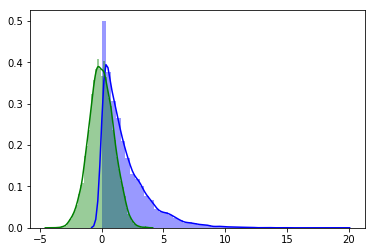

In [90]:
normal_dist = np.random.normal(0, 1, size=10000)
exponential_dist = np.random.exponential(1.9, size=10000)
sns.distplot( exponential_dist , color="blue")
sns.distplot( normal_dist , color="green")

plt.show()

We can use KL-Divergence to measure how different these really are!!!

In [92]:
t1 = stats.norm(0, 1)
t2 = stats.expon(1.9)

# domain to evaluate PDF on
x = np.linspace(-5, 5, 100)
stats.entropy(t1.pdf(x), t2.pdf(x))

inf

Perhaps surprisingly, the divergence is infinite!  Despite these two distributions appearing very similar, they are definitely different!  This gives us more reason to believe that we shouldn't always trust, even precise pictures.

Another important use of KL-Divergence is telling you by how much you are off from a theoretical optimum.  In other words, if we have enough information, it tells us how much we don't know.  

The interested, there are even more examples found here: 
    
https://www.programcreek.com/python/example/62037/scipy.stats.entropy
        

## Akaike Information Criterion && Bayesian Information Criterion

The AIC is another one of those tools that helps assess how well the model does.  It is an application of KL-divergence.  The way it does this is by looking at the overall goodness of fit of the model.  The smaller the AIC, the better the model fits the data.  And if a model has lots of parameters the score will always be higher, so this is a way of assessing goodness of fit, while avoiding overfitting.

In [94]:
import statsmodels.api as sm

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     64.87
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           2.27e-14
Time:                        18:37:06   Log-Likelihood:                -110.71
No. Observations:                  51   AIC:                             227.4
Df Residuals:                      48   BIC:                             233.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6807      0.957      5.934      0.000       3.756       7.606
speeding       0.1502      0.206      0.728      0.470      -0.265       0.565
alcohol        1.9152      0.241      7.954      0.000       1.431       2.399
==============================================================================
Omnibus:                        2.495   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                2.045
Skew:                           0.490   Prob(JB):                        0.360
Kurtosis:                       2.978   Cond. No.                         23.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
import statsmodels.api as sm

speeding = sm.add_constant(crashes[["speeding"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     29.27
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           1.87e-06
Time:                        18:37:29   Log-Likelihood:                -132.15
No. Observations:                  51   AIC:                             268.3
Df Residuals:                      49   BIC:                             272.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5459      1.243      7.680      0.000       7.048      12.044
speeding       1.2493      0.231      5.411      0.000       0.785       1.713
==============================================================================
Omnibus:                        2.847   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.681
Skew:                           0.542   Prob(JB):                        0.262
Kurtosis:                       2.709   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above example we look at two competing models for explaining the total number of car crashes per billion miles.  The first model uses two parameters and the AIC is lower than in the second model which only uses car crashes where the driver was speeding per billion miles.  And so we can say with confidence that the first model is definitely a better representation than the second - it has a higher AIC than the second, even though it has more parameters.  

The only real substantiative difference between AIC and BIC is the AIC is less likely to find the true model than BIC.  In fact it was shown that asymptotically, BIC will eventually find the true model, while AIC doesn't always.  It was however shown that AIC often does find good models, even if they aren't the theoretical "best".  Other than that, they are basically the same.  They just penalize extra parameters differently, in that AIC penalizes them more heavily than BIC does.

Source: https://en.wikipedia.org/wiki/Akaike_information_criterion#Comparison_with_BIC

## R-Squared

The next goodness of fit measure we will look at is $R^{2}$.

In [96]:
import numpy as np

def r_squared(true_y, pred_y):
    y_bar = np.mean(true_y)
    total_sum_of_squares = sum((true_y - y_bar)**2)
    residual_sum_of_squares = sum((true_y - pred_y)**2)
    return 1 - (residual_sum_of_squares/total_sum_of_squares)

The $R^{2}$ measure returns a float between 0 and 1 which gives a notion of how well the model fits the observed (or sometimes called the dependent) variable.  The closer to 1 the better the model fits the data.

Essentially, $R^{2}$ is the ratio of variance explained by the model compared with total variance in the observed variable.  It's important to note - $R^{2}$ is only true for linear models.  If you try to use it for non-linear models you can end up with values less than 0 or greater than 1, which make no sense.  

In [100]:
import statsmodels.api as sm

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     64.87
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           2.27e-14
Time:                        19:00:43   Log-Likelihood:                -110.71
No. Observations:                  51   AIC:                             227.4
Df Residuals:                      48   BIC:                             233.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6807      0.957      5.934      0.000       3.756       7.606
speeding       0.1502      0.206      0.728      0.470      -0.265       0.565
alcohol        1.9152      0.241      7.954      0.000       1.431       2.399
==============================================================================
Omnibus:                        2.495   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                2.045
Skew:                           0.490   Prob(JB):                        0.360
Kurtosis:                       2.978   Cond. No.                         23.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see the $R^{2}$ is 0.730 which is a pretty good measure of fit!  So we can say between this and the AIC being quiet low (lower than the case when we had one explaintory variable) we are doing pretty well.

## Mean Squared Error and Mean Absolute Error

The problems with $R^{2}$ are well documented but there are other measures which don't suffer from the same issues.  We'll look at two such measures here:

Mean Squared Error is simply the following:

In [102]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
mse(crashes["total"].values, result.fittedvalues)

4.498774812838514

Basically all we do is look at the average squared error.  Usually to put things back in the approximate units we take the root mean squared error:

In [104]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
rmse(crashes["total"].values, result.fittedvalues)

2.1210315445175523

But what does the number 2.121 mean?  One way you can make sense of this is by normalizing the result based on the range of values, but what's the right value to normalize by?  We could take the absolute difference between the largest and smallest predicted values.  But even such a transformation still doesn't answer the question of what Mean Squared Error means.  

The truth is, it's context specific.  So it depends on the units of the dependent variable.  In this case, we are saying we are off by about 2.121 car crashes per billion miles.  Is that a lot?  It depends on the context we are working in and the requirements of stringency we have placed infront of us.

Unfortunately there is no objective general rule about Mean Squared Error, all of it is context specific.  But the nice thing about Mean Squared Error is it is a true measure.  So for optimization problems its a great tool.  The only main issue I found is, it's far too sensitive to bad cases.  This is in part because it is squared and in part because it is a mean, both of which will overstate any individual cases in which the errors are extreme, even if the model does very well fitting most cases.

If outliers are important to your model, then we can say that mean squared error is a good measure to use.  If outliers are extremely rare, or unimportant to attempt to fit, you are better off simply either choosing a different metric or throwing out those cases and retraining your model.

However, it's important that the outliers need not be extreme only with respect to model fit, but must be extreme compared to the rest of the dependent and/or independent values in the dataset.


## Mean Absolute Error

The Mean Absolute Error functions much the same way as the Mean Squared Error.  The only difference is a different distance function is used to calculate the final error measure:

In [106]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
mae(crashes["total"].values, result.fittedvalues)

1.6711292264105282

Note that the Mean Absolute Error is smaller than the Mean Squared Error or even the Root Mean Squared Error, this is because the absolute value is a different distance function.

## Parameter Interpretation

* linear - linear model
* log - linear model
* inear - log model
* log - log model
* linear - exponential model

## References:

* http://seaborn.pydata.org/examples/horizontal_barplot.html?highlight=car%20crashes
* https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1
* https://www.forbes.com/sites/johnsonpierr/2017/06/15/with-the-public-clouds-of-amazon-microsoft-and-google-big-data-is-the-proverbial-big-deal/#6e5918692ac3
* https://stats.stackexchange.com/questions/59250/how-to-interpret-the-output-of-the-summary-method-for-an-lm-object-in-r
* https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence
* https://www.programcreek.com/python/example/62037/scipy.stats.entropy
* https://en.wikipedia.org/wiki/Akaike_information_criterion#Comparison_with_BIC